In [7]:
!uv pip install numpy pandas seaborn matplotlib scikit-learn

Using Python 3.12.12 environment at: /usr
Audited 5 packages in 126ms


In [8]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('/content/diabetes.csv')

In [10]:
df.shape

(768, 9)

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
df=df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

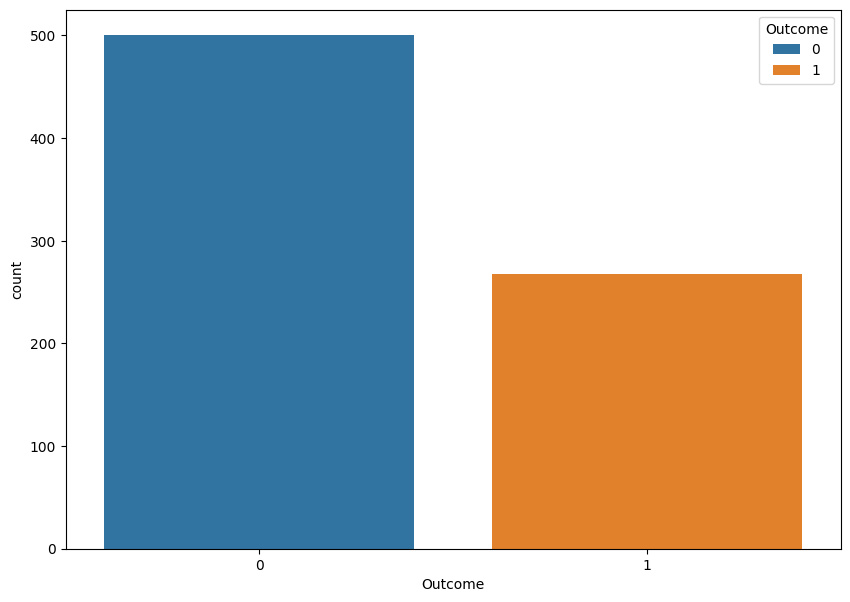

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome',data=df,hue="Outcome")


In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
df_copy=df.copy(deep=True)

df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.nan)

In [21]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DPF,0
Age,0
Outcome,0


In [22]:
df_copy['Glucose']=df_copy['Glucose'].fillna(df['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df['BloodPressure'].mean())
df_copy['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())
df_copy['Insulin']=df['Insulin'].fillna(df['Insulin'].median())
df_copy['BMI']=df['BMI'].fillna(df['BMI'].median())

In [23]:
df_copy.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DPF,0
Age,0
Outcome,0


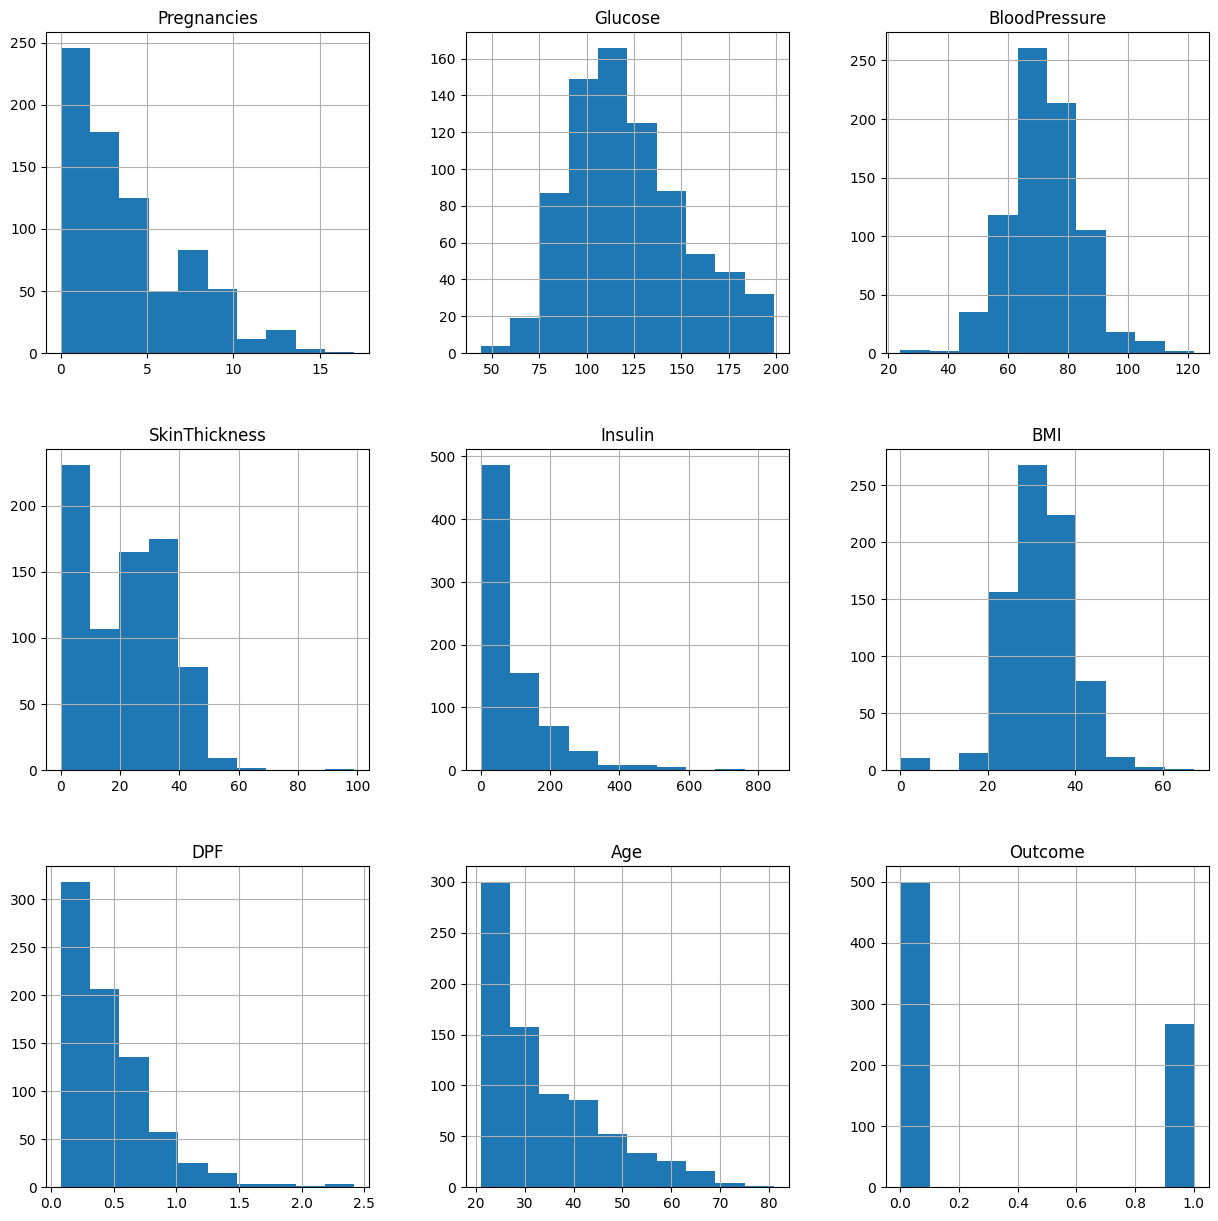

In [24]:
p = df_copy.hist(figsize=(15,15))

In [25]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='Outcome')
y=df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=4)

print('X_train:{}, X_test size: {}'.format(X_train.shape,X_test.shape))

X_train:(614, 8), X_test size: (154, 8)


In [26]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

sc.fit(X)

StandardScaler()

In [27]:
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(C=10, max_iter=1000)

scores = cross_val_score(lr, X, y, cv=5, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.77272727 0.74675325 0.75324675 0.81045752 0.77124183]
Mean accuracy: 0.7708853238265002


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

lr = RandomForestClassifier(n_estimators=10)

scores = cross_val_score(lr, X, y, cv=5, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.70779221 0.70779221 0.74025974 0.79738562 0.73202614]
Mean accuracy: 0.7370511841100077


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc=SVC(gamma='auto',kernel="rbf")

scores = cross_val_score(svc, X, y, cv=5, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.64935065 0.64935065 0.64935065 0.65359477 0.65359477]
Mean accuracy: 0.6510482981071216


In [33]:
from sklearn.model_selection import cross_val_score
svc=SVC(gamma='auto',kernel="rbf")

scores = cross_val_score(svc, X, y, cv=5, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.64935065 0.64935065 0.64935065 0.65359477 0.65359477]
Mean accuracy: 0.6510482981071216


In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

classifier=SVC(gamma='auto',kernel="rbf")
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[86, 16],
       [20, 32]])

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs'),
            'parameters': {
                'C': [1,5,10]
               }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },

        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.749593
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.730081
2,random_forest,{'n_estimators': 50},0.764228
3,svm,"{'C': 10, 'kernel': 'rbf'}",0.757724


In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

classifier=RandomForestClassifier(n_estimators=20,random_state=1)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[86, 16],
       [21, 31]])

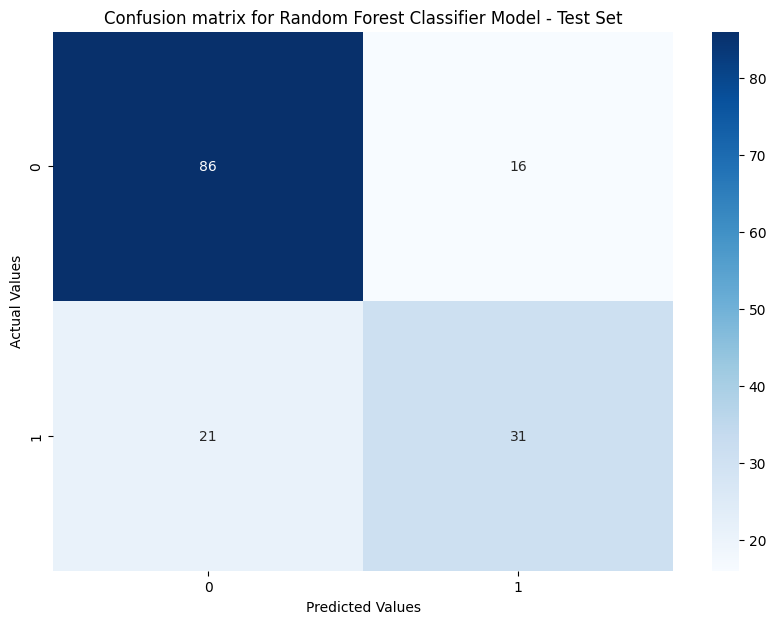

In [37]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [38]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm



array([[398,   0],
       [  3, 213]])

In [39]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x
    x = sc.transform(x)
    return classifier.predict(x)

In [40]:
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
